In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import fix_yahoo_finance as yf  
import pandas_datareader.data as web
from datetime import date, timedelta
import calendar

In [0]:
import tweepy
import csv
import sys,tweepy,csv,re
from textblob import TextBlob

In [0]:
n = 30 #no of days

In [0]:
def stock_prize(stock_nm,N): 
  current_date = date.today()
  days_before = (date.today()-timedelta(days=N))
  print(current_date,"  ",days_before)
   
  data = web.DataReader(stock_nm,'iex',days_before,current_date)
  print(N," days before current date: ",days_before)
  data['difference']= data.close-data.open
  
  return data


In [0]:
# name_of_stock = "TCS"
name_of_stock =input("Enter the stock name used in listing")

In [0]:
y=stock_prize(name_of_stock,n) 
print(y)

2019-04-14    2019-03-15
30  days before current date:  2019-03-15
            open    high    low  close  volume  difference
date                                                      
2019-03-15  6.69  6.6900  6.530   6.64  278269       -0.05
2019-03-18  6.71  6.9000  6.590   6.82  207589        0.11
2019-03-19  6.87  7.0800  6.740   6.89  236396        0.02
2019-03-20  6.87  7.3600  6.850   7.27  227881        0.40
2019-03-21  7.25  7.3100  7.030   7.16  192817       -0.09
2019-03-22  7.11  7.1900  6.960   7.06  167726       -0.05
2019-03-25  7.05  7.2800  7.010   7.17  130948        0.12
2019-03-26  7.24  7.6000  7.230   7.59  398198        0.35
2019-03-27  7.58  8.1700  7.550   8.00  411202        0.42
2019-03-28  8.00  8.4700  7.960   8.45  409209        0.45
2019-03-29  8.46  8.9600  8.460   8.80  565872        0.34
2019-04-01  8.87  8.9800  8.720   8.92  310210        0.05
2019-04-02  8.90  9.0400  8.760   8.86  438956       -0.04
2019-04-03  8.87  8.9700  8.800   8.90  247635  

In [0]:
df_stock = pd.DataFrame()
df_stock['Date'] = y.index
df_stock['difference'] = list(y.difference)

df_stock = df_stock.set_index(['Date'])
df_stock.index = pd.to_datetime(df_stock.index)

df_stock = df_stock.resample('D').ffill().reset_index()

print(df_stock)

         Date  difference
0  2019-03-15       -0.05
1  2019-03-16       -0.05
2  2019-03-17       -0.05
3  2019-03-18        0.11
4  2019-03-19        0.02
5  2019-03-20        0.40
6  2019-03-21       -0.09
7  2019-03-22       -0.05
8  2019-03-23       -0.05
9  2019-03-24       -0.05
10 2019-03-25        0.12
11 2019-03-26        0.35
12 2019-03-27        0.42
13 2019-03-28        0.45
14 2019-03-29        0.34
15 2019-03-30        0.34
16 2019-03-31        0.34
17 2019-04-01        0.05
18 2019-04-02       -0.04
19 2019-04-03        0.03
20 2019-04-04        0.00
21 2019-04-05       -0.23
22 2019-04-06       -0.23
23 2019-04-07       -0.23
24 2019-04-08        0.09
25 2019-04-09       -0.18
26 2019-04-10       -0.10
27 2019-04-11       -0.17
28 2019-04-12        0.18


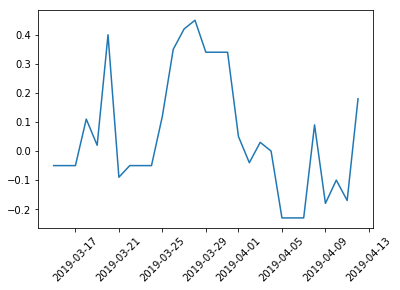

In [0]:
plt.xticks(rotation=45)
plt.plot(df_stock['Date'],df_stock['difference'])

In [0]:
####input your credentials here
      
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [0]:
current_date = date.today().isoformat()   
days_before = (date.today()-timedelta(days=n)).isoformat()

In [0]:
filename = 'tweets_dump_TCS.csv'

In [0]:
# Open/Create a file to append data
csvFile = open(filename, 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q=name_of_stock,
                           lang="en",
                           since="2019-03-08").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])


2019-04-14 09:43:07 RT @theindianpk: TCS 
Result move 
On negative opening buy on 1980 
on positive opening buy above 2040 
#stockdada #TCS #bulkish #nifty htt…
2019-04-14 09:40:33 TCS ski trip 2019.... everyone’s finding their feet on the first morning. Suns out but cold!! ☀️🎿⛷🇨🇭🏴󠁧󠁢󠁷󠁬󠁳󠁿 https://t.co/ig4WRyPhWr
2019-04-14 09:40:08 Our margin is industry leading, domestically and globally: V Ramakrishnan, CFO, TCS https://t.co/92t5ZVs5Pw https://t.co/Cax58UYm14
2019-04-14 09:39:26 RT @QDStores: #Giveaway time!

Do you want a chance to #WIN this Spring Cleaning Hamper?

To enter all you have to do is FOLLOW our page an…
2019-04-14 09:38:54 RT @ChiragS06645168: SAHEL - Virtual Reality (#VR) App for Library

#Sahel is a Virtual Reality (VR) App of the @VSLIIMA , @IIMAhmedabad .I…
2019-04-14 09:38:05 RT @O2academybrix: Another give away? Oh go on then! RT &amp; Follow to win @JorjaSmith‘s Lost &amp; Found and some merch from her shows in October…
2019-04-14 09:37:50 RT @blackcircles: 🌟 #WIN

In [0]:
df = pd.read_csv(filename,header=None,names=['date_time','text'])
df.shape

(18412, 2)

In [0]:
df.head()

,date_time,text
0,2019-04-14 09:43:07,b'RT @theindianpk: TCS \nResult move \nOn nega...
1,2019-04-14 09:40:33,b'TCS ski trip 2019.... everyone\xe2\x80\x99s ...
2,2019-04-14 09:40:08,"b'Our margin is industry leading, domestically..."
3,2019-04-14 09:39:26,b'RT @QDStores: #Giveaway time!\n\nDo you want...
4,2019-04-14 09:38:54,b'RT @ChiragS06645168: SAHEL - Virtual Reality...


In [0]:
df.dropna(inplace = True) 
date_time_temp = df['date_time'].str.split(" ",n = 1, expand = True)
df['Date'] = date_time_temp[0]
df['Time'] = date_time_temp[1]
df.drop(columns = ['date_time'], inplace = True)
df.head()

,text,Date,Time
0,b'RT @theindianpk: TCS \nResult move \nOn nega...,2019-04-14,09:43:07
1,b'TCS ski trip 2019.... everyone\xe2\x80\x99s ...,2019-04-14,09:40:33
2,"b'Our margin is industry leading, domestically...",2019-04-14,09:40:08
3,b'RT @QDStores: #Giveaway time!\n\nDo you want...,2019-04-14,09:39:26
4,b'RT @ChiragS06645168: SAHEL - Virtual Reality...,2019-04-14,09:38:54


### Clean the tweets

In [0]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [0]:
%%time
print ("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%1000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, len(df) ))
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))                          

Cleaning the tweets...

Tweets 1000 of 18412 has been processed
Tweets 2000 of 18412 has been processed
Tweets 3000 of 18412 has been processed
Tweets 4000 of 18412 has been processed
Tweets 5000 of 18412 has been processed
Tweets 6000 of 18412 has been processed
Tweets 7000 of 18412 has been processed
Tweets 8000 of 18412 has been processed
Tweets 9000 of 18412 has been processed
Tweets 10000 of 18412 has been processed
Tweets 11000 of 18412 has been processed
Tweets 12000 of 18412 has been processed
Tweets 13000 of 18412 has been processed
Tweets 14000 of 18412 has been processed
Tweets 15000 of 18412 has been processed
Tweets 16000 of 18412 has been processed
Tweets 17000 of 18412 has been processed
Tweets 18000 of 18412 has been processed
CPU times: user 7.16 s, sys: 130 ms, total: 7.29 s
Wall time: 7.31 s


In [0]:
df['text'] = clean_tweet_texts

In [0]:
df.head()

,text,Date,Time
0,rt tcs nresult move non negative opening buy o...,2019-04-14,09:43:07
1,tcs ski trip everyone xe finding their feet on...,2019-04-14,09:40:33
2,our margin is industry leading domestically an...,2019-04-14,09:40:08
3,rt giveaway time ndo you want chance to win th...,2019-04-14,09:39:26
4,rt sahel virtual reality vr app for library sa...,2019-04-14,09:38:54


### Load the model

In [0]:
!pip install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file

In [0]:
# https://drive.google.com/open?id=1qgN3jKOgV7mdui8OEL6mc8pzw32UBJzG
File_ID = '1qgN3jKOgV7mdui8OEL6mc8pzw32UBJzG'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('finalized_model.sav')

In [0]:
import pickle

filename_model = 'finalized_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename_model, 'rb'))
# result = loaded_model.score(x_test, y_test)
# print(result)

In [0]:
list_of_tweets = df['text']

In [0]:
y_pred = loaded_model.predict(list_of_tweets)
print(y_pred)
y_pred.shape

[1 1 1 ... 0 1 1]


(18412,)

In [0]:
df['sentiment'] = y_pred

In [0]:
print(df)

                                                    text        Date  \
0      rt tcs nresult move non negative opening buy o...  2019-04-14   
1      tcs ski trip everyone xe finding their feet on...  2019-04-14   
2      our margin is industry leading domestically an...  2019-04-14   
3      rt giveaway time ndo you want chance to win th...  2019-04-14   
4      rt sahel virtual reality vr app for library sa...  2019-04-14   
5      rt another give away oh go on then rt follow t...  2019-04-14   
6      rt xf win an apple ipad courtesy of xf nto ent...  2019-04-14   
7      tcs ski trip pupils up for breakfast at am it ...  2019-04-14   
8      rt xf xb win luxury easter chocolates courtesy...  2019-04-14   
9      rt xf xef xb win lego xc xae porsche rsr court...  2019-04-14   
10     rt report tcs ceo rajesh gopinathan described ...  2019-04-14   
11     rt competition time nwe re giving lucky winner...  2019-04-14   
12     tcs blockchain powers cross border securities ...  2019-0

In [0]:
df = df.sort_values(['Date', 'Time'], ascending = [True, True]).reset_index(drop = True)

In [0]:
print(df)

                                                    text        Date  \
0      rt xe xa xef xb win mother day dinner courtesy...  2019-04-07   
1      rt it competition time to enter follow us like...  2019-04-07   
2      pl read what is posted below with scamgress la...  2019-04-07   
3      rt have crazy high five idea be ready to win b...  2019-04-07   
4      rt contestalert nwe xe re celebrating honorgal...  2019-04-07   
5      pee modi xe month to three months plus for eve...  2019-04-07   
6      rt needed new passport book visited passport s...  2019-04-07   
7      rt xf xef xb win lego xc xae porsche gt rs cou...  2019-04-07   
8      rt does tcs is forming ascending triangle patt...  2019-04-07   
9      rt needed new passport book visited passport s...  2019-04-07   
10         yeh twitter hy koi tcs service to nh xf xf xf  2019-04-07   
11     rt xf xef xb win lego xc xae porsche rsr court...  2019-04-07   
12     rt today is the last day to share your crazy h...  2019-0

In [0]:
df_visualize = df[['Date', 'sentiment']]
df_visualize
# df_visualize = df_visualize.drop('text',axis = 1)
# df_visualize = df_visualize.drop('Time',axis = 1)

,Date,sentiment
0,2019-04-07,1
1,2019-04-07,1
2,2019-04-07,0
3,2019-04-07,1
4,2019-04-07,1
5,2019-04-07,0
6,2019-04-07,1
7,2019-04-07,1
8,2019-04-07,0
9,2019-04-07,1


In [0]:
df_visualize['freq'] = df_visualize.groupby(['Date','sentiment'])['Date'].transform('count')
df_visualize = df_visualize.drop_duplicates()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_visualize

,Date,sentiment,freq
0,2019-04-07,1,527
2,2019-04-07,0,63
590,2019-04-08,1,3198
594,2019-04-08,0,214
4002,2019-04-09,1,3831
4009,2019-04-09,0,229
8062,2019-04-10,0,156
8063,2019-04-10,1,2032
10250,2019-04-11,1,2018
10255,2019-04-11,0,159


### Combine sentiment ( positive + negative ) tweets

In [0]:
df_positive = df_visualize.loc[df_visualize['sentiment'] == 1.0]
df_positive = df_positive.drop('sentiment',axis = 1)
df_positive = df_positive.reset_index(drop = True)
print(df_positive)

         Date  freq
0  2019-04-07   527
1  2019-04-08  3198
2  2019-04-09  3831
3  2019-04-10  2032
4  2019-04-11  2018
5  2019-04-12  3077
6  2019-04-13  2026
7  2019-04-14   406


In [0]:
df_negative = df_visualize.loc[df_visualize['sentiment'] == 0]
df_negative = df_negative.drop('sentiment',axis = 1)
df_negative = df_negative.reset_index(drop = True)
print(df_negative)

         Date  freq
0  2019-04-07    63
1  2019-04-08   214
2  2019-04-09   229
3  2019-04-10   156
4  2019-04-11   159
5  2019-04-12   230
6  2019-04-13   180
7  2019-04-14    66


In [0]:
difference = df_positive['freq'] - df_negative['freq']
print(difference)

0     464
1    2984
2    3602
3    1876
4    1859
5    2847
6    1846
7     340
Name: freq, dtype: int64


In [0]:
df_positive['sentiment_difference'] = difference
print(df_positive)

         Date  freq  sentiment_difference
0  2019-04-07   527                   464
1  2019-04-08  3198                  2984
2  2019-04-09  3831                  3602
3  2019-04-10  2032                  1876
4  2019-04-11  2018                  1859
5  2019-04-12  3077                  2847
6  2019-04-13  2026                  1846
7  2019-04-14   406                   340


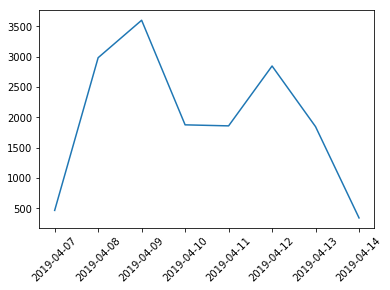

In [0]:
plt.xticks(rotation=45)
plt.plot(df_positive['Date'],df_positive['sentiment_difference'])

In [0]:
pos_difference = df_positive['sentiment_difference']
print(pos_difference)

0     464
1    2984
2    3602
3    1876
4    1859
5    2847
6    1846
7     340
Name: sentiment_difference, dtype: int64


In [0]:
pos_difference = 2 * (pos_difference - pos_difference.min())
print(pos_difference)

0     248
1    5288
2    6524
3    3072
4    3038
5    5014
6    3012
7       0
Name: sentiment_difference, dtype: int64


In [0]:
pos_difference = df_positive['sentiment_difference']
# pos_difference = (pos_difference - pos_difference.mean())/pos_difference.std()
pos_difference = (2 *(pos_difference - pos_difference.min()) / (pos_difference.max() - pos_difference.min())) - 1
df_positive['sentiment_difference'] = pos_difference
df_positive = df_positive.reset_index(drop = True)
print(df_positive)

         Date  freq  sentiment_difference
0  2019-04-07   527             -0.923973
1  2019-04-08  3198              0.621091
2  2019-04-09  3831              1.000000
3  2019-04-10  2032             -0.058246
4  2019-04-11  2018             -0.068670
5  2019-04-12  3077              0.537094
6  2019-04-13  2026             -0.076640
7  2019-04-14   406             -1.000000


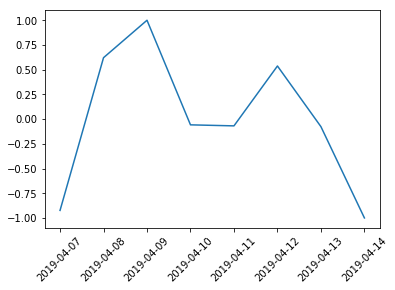

In [0]:
plt.xticks(rotation=45)
plt.plot(df_positive['Date'],df_positive['sentiment_difference'])

In [0]:
df_final = df_positive
df_final['stock_difference'] = df_stock['difference']
stock_difference = df_final['stock_difference']
stock_difference = (2 *(stock_difference - stock_difference.min()) / (stock_difference.max() - stock_difference.min())) - 1
df_final['stock_difference'] = stock_difference
print(df_final)

         Date  freq  sentiment_difference  stock_difference
0  2019-04-07   527             -0.923973         -0.836735
1  2019-04-08  3198              0.621091         -0.836735
2  2019-04-09  3831              1.000000         -0.836735
3  2019-04-10  2032             -0.058246         -0.183673
4  2019-04-11  2018             -0.068670         -0.551020
5  2019-04-12  3077              0.537094          1.000000
6  2019-04-13  2026             -0.076640         -1.000000
7  2019-04-14   406             -1.000000         -0.836735


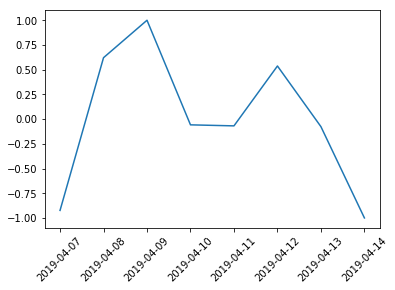

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['sentiment_difference'])

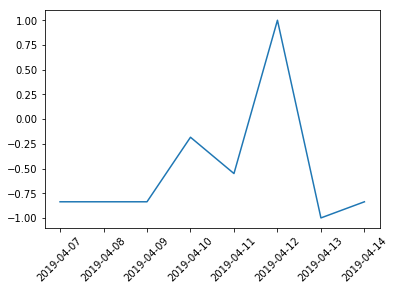

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['stock_difference'])

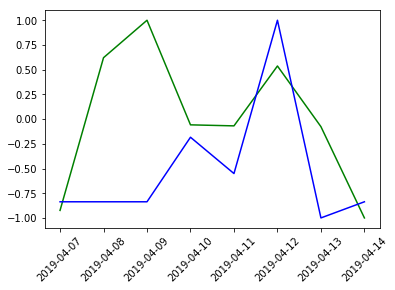

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['sentiment_difference'],'g')
plt.plot(df_final['Date'],df_final['stock_difference'],'b')
plt.show()

### Take positive and negative tweets seperately for normalization

In [0]:
df_positive = df_visualize.loc[df_visualize['sentiment'] == 1.0]
df_positive = df_positive.drop('sentiment',axis = 1)
print(df_positive)

             Date  freq
0      2019-04-07   527
590    2019-04-08  3198
4002   2019-04-09  3831
8063   2019-04-10  2032
10250  2019-04-11  2018
12427  2019-04-12  3077
15734  2019-04-13  2026
17940  2019-04-14   406


In [0]:
pos_freq = df_positive['freq']
pos_freq = (pos_freq - pos_freq.mean())/pos_freq.std()
df_positive['freq'] = pos_freq
df_positive = df_positive.reset_index(drop = True)
print(df_positive)

         Date      freq
0  2019-04-07 -1.316193
1  2019-04-08  0.864163
2  2019-04-09  1.380885
3  2019-04-10 -0.087651
4  2019-04-11 -0.099079
5  2019-04-12  0.765390
6  2019-04-13 -0.092549
7  2019-04-14 -1.414966


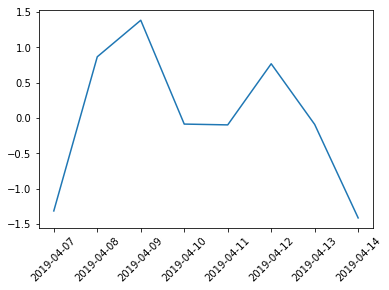

In [0]:
plt.xticks(rotation=45)
plt.plot(df_positive['Date'],df_positive['freq'])

In [0]:
df_negative = df_visualize.loc[df_visualize['sentiment'] == 0]
df_negative = df_negative.drop('sentiment',axis = 1)
print(df_negative)

             Date  freq
2      2019-04-07    63
594    2019-04-08   214
4009   2019-04-09   229
8062   2019-04-10   156
10255  2019-04-11   159
12430  2019-04-12   230
15747  2019-04-13   180
17963  2019-04-14    66


In [0]:
neg_freq = df_negative['freq']
neg_freq = (neg_freq - neg_freq.mean())/neg_freq.std()
df_negative['freq'] = neg_freq
df_negative = df_negative.reset_index(drop = True)
print(df_negative)

         Date      freq
0  2019-04-07 -1.484687
1  2019-04-08  0.776980
2  2019-04-09  1.001649
3  2019-04-10 -0.091740
4  2019-04-11 -0.046806
5  2019-04-12  1.016627
6  2019-04-13  0.267730
7  2019-04-14 -1.439753


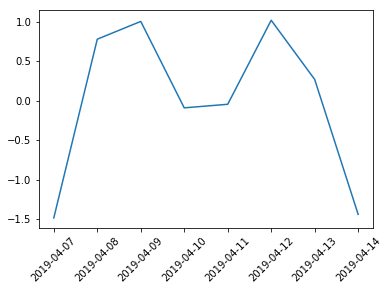

In [0]:
plt.xticks(rotation=45)
plt.plot(df_negative['Date'],df_negative['freq'])

In [0]:
# df_final = pd.DataFrame(index = df_negative['Date'])
df_final = pd.DataFrame()

In [0]:
df_final['Date'] = df_negative['Date']
difference = df_positive['freq'] - df_negative['freq']
df_final['sentiment_difference'] = difference
df_final['stock_difference'] = df_stock['difference']
stock_difference = df_final['stock_difference']
stock_difference = (stock_difference - stock_difference.mean())/stock_difference.std()
df_final['stock_difference'] = stock_difference
print(df_final)

         Date  sentiment_difference  stock_difference
0  2019-04-07              0.168494         -0.494242
1  2019-04-08              0.087183         -0.494242
2  2019-04-09              0.379236         -0.494242
3  2019-04-10              0.004089          0.494242
4  2019-04-11             -0.052273         -0.061780
5  2019-04-12             -0.251237          2.285868
6  2019-04-13             -0.360279         -0.741362
7  2019-04-14              0.024787         -0.494242


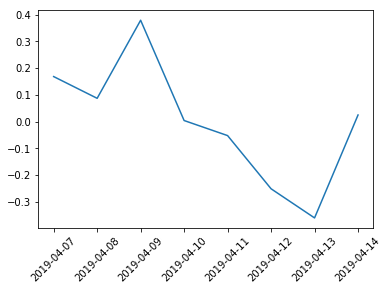

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['sentiment_difference'])

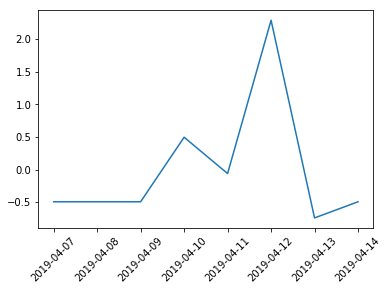

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['stock_difference'])

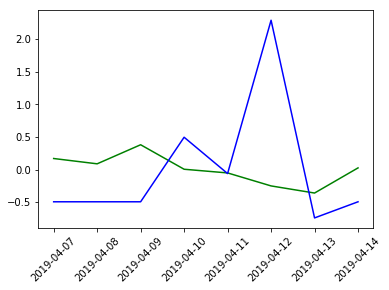

In [0]:
plt.xticks(rotation=45)
plt.plot(df_final['Date'],df_final['sentiment_difference'],'g')
plt.plot(df_final['Date'],df_final['stock_difference'],'b')
plt.show()